# Import Libraries and Datasets; Adjust Datasets to Reflect Households in Bihar

In [1]:
!pip install eep153_tools
!pip install -r requirements.txt

  Using cached eep153_tools-0.11-py2.py3-none-any.whl (4.4 kB)
  Using cached CFEDemands-0.4.1-py2.py3-none-any.whl (39 kB)
  Using cached numpy-1.22.3-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.8 MB)
  Using cached oauth2client-4.1.3-py2.py3-none-any.whl (98 kB)
  Using cached pandas-1.4.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.7 MB)
  Using cached plotly-5.7.0-py2.py3-none-any.whl (28.8 MB)
Processing /home/jovyan/.cache/pip/wheels/20/7e/30/7d702acd6a1e89911301cd9dbf9cb9870ca80c0e64bc2cde23/gnupg-2.3.1-py3-none-any.whl
  Using cached ConsumerDemands-0.3.dev0-py2.py3-none-any.whl (12 kB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
  Attempting uninstall: plotly
    Found existing installatio

In [2]:
!pip install pyarrow

  Using cached pyarrow-7.0.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)


In [4]:
import cfe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Missing dependencies for OracleDemands.


In [5]:
z =  pd.read_parquet('z.parquet', engine = 'pyarrow')

In [6]:
#q =  pd.read_parquet('q.parquet', engine = 'pyarrow').unstack('j')
q = pd.read_parquet('q.parquet', engine = 'pyarrow').reset_index()
q

,j,i,unit,Frequency,total_quantity
0,410001101,apple,kg,Monthly,250.0
1,410001101,arhar (tur),kg,Monthly,2000.0
2,410001101,besan,kg,Monthly,2000.0
3,410001101,black pepper,gm,Monthly,20.0
4,410001101,brinjal,kg,Monthly,5000.0
...,...,...,...,...,...
4423639,799982301,tomato,kg,Monthly,3000.0
4423640,799982301,turmeric,gm,Monthly,300.0
4423641,799982301,urd,kg,Monthly,1000.0
4423642,799982301,wheat/atta - P.D.S.,kg,Monthly,10000.0


We also need to make sure that we only include households in Bihar, so we filter out households in other states below.

In [7]:
z_bihar = z[z['m'] == 'Bihar']
bihar_households = z_bihar.index
q_bihar2 = q[q['j'].isin(bihar_households)]
q_bihar2
#q_adjusted = q.T.reset_index()
#q_bihar = q_adjusted[q_adjusted['j'].isin(bihar_households)]
#q_bihar

,j,i,unit,Frequency,total_quantity
1335859,470441101,arhar (tur),kg,Monthly,2500.0
1335860,470441101,"biscuits, chocolates",Re,Monthly,0.0
1335861,470441101,black pepper,gm,Monthly,100.0
1335862,470441101,"cake, pastry, prepared sweets",Re,Monthly,0.0
1335863,470441101,cashewnut,kg,Monthly,250.0
...,...,...,...,...,...
3155891,746992301,tea : cups,no.,Monthly,10.0
3155892,746992301,tea : leaf,gm,Monthly,100.0
3155893,746992301,tomato,kg,Monthly,2000.0
3155894,746992301,turmeric,gm,Monthly,450.0


In [8]:
z_bihar.head()

k,rural,m,religion,social group,Males 0-1,Males 1-5,Males 5-10,Males 10-15,Males 15-20,Males 20-30,...,Males 60-100,Females 0-1,Females 1-5,Females 5-10,Females 10-15,Females 15-20,Females 20-30,Females 30-50,Females 50-60,Females 60-100
j,,,,,,,,,,,,,,,,,,,,,
470441101,Urban,Bihar,Hinduism,Other backward class,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
470441102,Urban,Bihar,Hinduism,Other backward class,0,0,0,0,1,2,...,0,0,0,0,0,0,0,0,0,0
470441201,Urban,Bihar,Hinduism,Other backward class,0,1,1,0,1,0,...,0,0,0,1,1,0,0,1,0,0
470441202,Urban,Bihar,Hinduism,Other backward class,0,0,1,2,0,0,...,0,0,0,0,0,0,0,1,0,0
470441203,Urban,Bihar,Hinduism,Other backward class,0,0,0,0,0,2,...,0,0,0,0,0,1,0,0,1,0


In [9]:
x = pd.read_parquet('x.parquet', engine = 'pyarrow').unstack('j')

In [10]:
x_adjusted = x.T.reset_index()
x_bihar = x_adjusted[x_adjusted['j'].isin(bihar_households)]
x_bihar.head()

i,level_0,j,apple,arhar (tur),baby food,bajra & products,banana,barley & products,beef,beer,...,toddy,tomato,turmeric,urd,"vanaspati, margarine",walnut,watermelon,wheat/atta - P.D.S.,wheat/atta - other sources,"zarda,kimam,surti"
Frequency,,,Monthly,Monthly,Monthly,Monthly,Monthly,Monthly,Monthly,Monthly,...,Monthly,Monthly,Monthly,Monthly,Monthly,Monthly,Monthly,Monthly,Monthly,Monthly
28968,total_value,470441101,NaN,150.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,10.0,15.0,NaN,NaN,NaN,NaN,NaN,325.0,NaN
28969,total_value,470441102,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,480.0,NaN
28970,total_value,470441201,NaN,180.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,25.0,40.0,NaN,NaN,NaN,NaN,NaN,900.0,NaN
28971,total_value,470441202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,50.0,25.0,NaN,NaN,NaN,NaN,NaN,450.0,NaN
28972,total_value,470441203,NaN,130.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,12.0,40.0,NaN,NaN,NaN,NaN,NaN,450.0,NaN


In [11]:
n =  pd.read_parquet('n.parquet', engine = 'pyarrow')
n = n.rename(columns={'calories per unit(kcal)': 'Calories', 'fat per unit(gm)': 'Fat', 'protein per unit(gm)': 'Protein'})
n

,Calories,Fat,i,Protein,rural,t,unit
1,3280.000000,13.00,ragi,73.00,NaN,50,kg
4,1100.000000,2.00,other cereal subs.,16.00,NaN,50,kg
5,3420.000000,36.00,maize-other sources,111.00,NaN,50,kg
7,3420.000000,36.00,maize - pds,111.00,NaN,50,kg
8,3360.000000,13.00,barley,115.00,NaN,50,kg
...,...,...,...,...,...,...,...
145,24.700001,0.95,other served processed food,0.70,0.0,68,Re
146,21.100000,0.85,"cake, pastry, prepared sweets",0.20,0.0,68,Re
147,28.500000,0.17,"biscuits, chocolates",0.35,0.0,68,Re
148,24.700001,0.95,"papad, bhujia, namkeen, mixture, chanachur",0.70,0.0,68,Re


# Import RDA Data and Mapping RDA to Households in Bihar
RDA is a dataframe indicating the recommended daily allowances in India. As we see below, RDA includes different age/sex groups and ranges than what we see in our household data. So, we created a dataframe, rda_fixed, that shows the recommended daily allowances in India corresponding to the age/sex categories in the datasets we imported above.

In [12]:
rda = pd.read_pickle('indian_rda.df').T 
rda = rda.replace('', np.nan)
rda

,C 0-0.5,C 0.5-1,C 1-3,C 4-6,C 7-9,B 10-12,G 10-12,B 13-15,G 13-15,B 16-17,G 16-17,M,W
Calories,NaN,NaN,1060.0,1350.0,1690.0,2190.0,2010.0,2750.0,2330.0,3020.0,2440.0,2730.0,2230.0
Protein,NaN,NaN,16.7,20.1,29.5,39.9,40.4,54.3,51.9,61.5,55.5,60.0,55.0
Fat,NaN,19.0,27.0,25.0,30.0,35.0,35.0,45.0,40.0,50.0,35.0,30.0,25.0
Calcium,500.0,500.0,600.0,600.0,600.0,800.0,800.0,800.0,800.0,800.0,800.0,600.0,1200.0
Iron,NaN,5.0,9.0,13.0,16.0,21.0,27.0,32.0,27.0,28.0,26.0,17.0,21.0
Betacarotene,NaN,2800.0,3200.0,3200.0,4800.0,4800.0,4800.0,4800.0,4800.0,4800.0,4800.0,4800.0,4800.0
Thiamine,0.2,0.3,0.5,0.7,0.8,1.1,1.0,1.4,1.2,1.5,1.0,1.4,1.1
Riboflavin,0.3,0.4,0.6,0.8,1.0,1.3,1.2,1.6,1.4,1.8,1.2,1.4,1.3
Niacin,NaN,NaN,8.0,11.0,13.0,15.0,13.0,16.0,14.0,17.0,14.0,18.0,14.0
Ascorbic Acid,25.0,25.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0


In [13]:
rda_fixed = pd.DataFrame(index = rda.index)
rda_fixed['Males 60-100'] = rda['M'].to_list()
rda_fixed['Males 50-60'] = rda['M'].to_list()
rda_fixed['Males 30-50'] = rda['M'].to_list()
rda_fixed['Males 20-30'] = rda['M'].to_list()
rda_fixed['Males 15-20'] = (np.array(rda['M']) + np.array(rda['B 16-17'])) / 2
rda_fixed['Males 10-15'] = (np.array(rda['B 10-12']) + np.array(rda['B 13-15'])) / 2
rda_fixed['Males 5-10'] = (np.array(rda['C 4-6']) + np.array(rda['C 7-9'])) / 2
rda_fixed['Males 1-5'] = (np.array(rda['C 1-3']) + np.array(rda['C 4-6'])) / 2
rda_fixed['Males 0-1'] = (np.array(rda['C 0-0.5']) + np.array(rda['C 0.5-1'])) / 2
rda_fixed['Females 60-100'] = rda['W'].to_list()
rda_fixed['Females 50-60'] = rda['W'].to_list()
rda_fixed['Females 30-50'] = rda['W'].to_list()
rda_fixed['Females 20-30'] = rda['W'].to_list()
rda_fixed['Females 15-20'] = (np.array(rda['W']) + np.array(rda['G 16-17'])) / 2
rda_fixed['Females 10-15'] = (np.array(rda['G 10-12']) + np.array(rda['G 13-15'])) / 2
rda_fixed['Females 5-10'] = (np.array(rda['C 4-6']) + np.array(rda['C 7-9'])) / 2
rda_fixed['Females 1-5'] = (np.array(rda['C 1-3']) + np.array(rda['C 4-6'])) / 2
rda_fixed['Females 0-1'] = (np.array(rda['C 0-0.5']) + np.array(rda['C 0.5-1'])) / 2
rda_fixed

,Males 60-100,Males 50-60,Males 30-50,Males 20-30,Males 15-20,Males 10-15,Males 5-10,Males 1-5,Males 0-1,Females 60-100,Females 50-60,Females 30-50,Females 20-30,Females 15-20,Females 10-15,Females 5-10,Females 1-5,Females 0-1
Calories,2730.0,2730.0,2730.0,2730.0,2875.00,2470.00,1520.00,1205.0,NaN,2230.0,2230.0,2230.0,2230.0,2335.00,2170.00,1520.00,1205.0,NaN
Protein,60.0,60.0,60.0,60.0,60.75,47.10,24.80,18.4,NaN,55.0,55.0,55.0,55.0,55.25,46.15,24.80,18.4,NaN
Fat,30.0,30.0,30.0,30.0,40.00,40.00,27.50,26.0,NaN,25.0,25.0,25.0,25.0,30.00,37.50,27.50,26.0,NaN
Calcium,600.0,600.0,600.0,600.0,700.00,800.00,600.00,600.0,500.00,1200.0,1200.0,1200.0,1200.0,1000.00,800.00,600.00,600.0,500.00
Iron,17.0,17.0,17.0,17.0,22.50,26.50,14.50,11.0,NaN,21.0,21.0,21.0,21.0,23.50,27.00,14.50,11.0,NaN
Betacarotene,4800.0,4800.0,4800.0,4800.0,4800.00,4800.00,4000.00,3200.0,NaN,4800.0,4800.0,4800.0,4800.0,4800.00,4800.00,4000.00,3200.0,NaN
Thiamine,1.4,1.4,1.4,1.4,1.45,1.25,0.75,0.6,0.25,1.1,1.1,1.1,1.1,1.05,1.10,0.75,0.6,0.25
Riboflavin,1.4,1.4,1.4,1.4,1.60,1.45,0.90,0.7,0.35,1.3,1.3,1.3,1.3,1.25,1.30,0.90,0.7,0.35
Niacin,18.0,18.0,18.0,18.0,17.50,15.50,12.00,9.5,NaN,14.0,14.0,14.0,14.0,14.00,13.50,12.00,9.5,NaN
Ascorbic Acid,40.0,40.0,40.0,40.0,40.00,40.00,40.00,40.0,25.00,40.0,40.0,40.0,40.0,40.00,40.00,40.00,40.0,25.00


Now that we have a dataframe detailing the recommended daily intakes with the same age/sex groups as our imported dataset, we want to do a matrix multiplication of this dataframe and z_bihar_ages, which tells us how many people are in each age/sex group per household.

In [16]:
z_bihar_ages = z_bihar.iloc[:, 4:]
z_bihar_ages.to_numpy()

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 2, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 0]])

In [17]:
transposed_rda = rda_fixed.reset_index().rename(columns={'index': 'Nutrition'}).drop(['Nutrition'], axis=1).T
transposed_rda = transposed_rda.to_numpy()
transposed_rda

array([[2.730e+03, 6.000e+01, 3.000e+01, 6.000e+02, 1.700e+01, 4.800e+03,
        1.400e+00, 1.400e+00, 1.800e+01, 4.000e+01],
       [2.730e+03, 6.000e+01, 3.000e+01, 6.000e+02, 1.700e+01, 4.800e+03,
        1.400e+00, 1.400e+00, 1.800e+01, 4.000e+01],
       [2.730e+03, 6.000e+01, 3.000e+01, 6.000e+02, 1.700e+01, 4.800e+03,
        1.400e+00, 1.400e+00, 1.800e+01, 4.000e+01],
       [2.730e+03, 6.000e+01, 3.000e+01, 6.000e+02, 1.700e+01, 4.800e+03,
        1.400e+00, 1.400e+00, 1.800e+01, 4.000e+01],
       [2.875e+03, 6.075e+01, 4.000e+01, 7.000e+02, 2.250e+01, 4.800e+03,
        1.450e+00, 1.600e+00, 1.750e+01, 4.000e+01],
       [2.470e+03, 4.710e+01, 4.000e+01, 8.000e+02, 2.650e+01, 4.800e+03,
        1.250e+00, 1.450e+00, 1.550e+01, 4.000e+01],
       [1.520e+03, 2.480e+01, 2.750e+01, 6.000e+02, 1.450e+01, 4.000e+03,
        7.500e-01, 9.000e-01, 1.200e+01, 4.000e+01],
       [1.205e+03, 1.840e+01, 2.600e+01, 6.000e+02, 1.100e+01, 3.200e+03,
        6.000e-01, 7.000e-01, 9.500e+

nutrition_by_house is a dataframe that tells us the recommended daily allowances per household, based on the specific individuals in that household (i.e. their ages, how many people there are, etc). 

In [19]:
nutrition_by_house = z_bihar_ages.dot(transposed_rda)
nutrition_by_house.columns = rda_fixed.index
#nutrition_by_house['Household'] = maharashtra_id
#nutrition_by_house.index = nutrition_by_house['Household']
nutrition_by_house

,Calories,Protein,Fat,Calcium,Iron,Betacarotene,Thiamine,Riboflavin,Niacin,Ascorbic Acid
j,,,,,,,,,,
470441101,NaN,NaN,NaN,1900.0,NaN,NaN,2.80,3.20,NaN,120.0
470441102,NaN,NaN,NaN,2300.0,NaN,NaN,3.95,4.50,NaN,120.0
470441201,NaN,NaN,NaN,5500.0,NaN,NaN,7.95,8.80,NaN,280.0
470441202,NaN,NaN,NaN,3000.0,NaN,NaN,5.70,6.00,NaN,200.0
470441203,NaN,NaN,NaN,3800.0,NaN,NaN,4.75,5.55,NaN,200.0
...,...,...,...,...,...,...,...,...,...,...
746991301,NaN,NaN,NaN,2700.0,NaN,NaN,3.90,4.45,NaN,160.0
746992101,NaN,NaN,NaN,5300.0,NaN,NaN,5.05,6.05,NaN,225.0
746992201,NaN,NaN,NaN,5900.0,NaN,NaN,7.10,8.30,NaN,280.0


Next, we then merged our nutrient dataset and q_bihar to create q_bihar_n, which describes the total_quantity, calorie, fat per unit, and protein per unit intake for each food item in each household.

In [50]:
q_bihar_n = q_bihar2.merge(n, left_on='i', right_on='i')
q_bihar_n['total_quantity'] = q_bihar_n['total_quantity']/1000
#q_bihar_n['Calories'] = q_bihar_n['Calories']/1000
#q_bihar_n['Fat'] = q_bihar_n['Fat']/1000
#q_bihar_n['Protein'] = q_bihar_n['Protein']/1000
q_bihar_n

,j,i,unit,Frequency,total_quantity,Calories,Fat,Protein
0,470441101,arhar (tur),kg,Monthly,2.5,3350.0,17.0,223.0
1,470441102,arhar (tur),kg,Monthly,1.0,3350.0,17.0,223.0
2,470441201,arhar (tur),kg,Monthly,3.0,3350.0,17.0,223.0
3,470441203,arhar (tur),kg,Monthly,2.0,3350.0,17.0,223.0
4,470441204,arhar (tur),kg,Monthly,1.0,3350.0,17.0,223.0
...,...,...,...,...,...,...,...,...
83918,746991301,maize & products,kg,Monthly,0.5,3420.0,36.0,111.0
83919,746992101,maize & products,kg,Monthly,5.0,3420.0,36.0,111.0
83920,746992201,maize & products,kg,Monthly,4.0,3420.0,36.0,111.0
83921,746992202,maize & products,kg,Monthly,0.5,3420.0,36.0,111.0


# Nutritional Adequacy of Food Demands

zbar is the proportion of households in Bihar that have each of the age/sex groups shown below.

In [15]:
zbar = z_bihar.mean(axis=0)
zbar

/tmp/ipykernel_25/1843868859.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  zbar = z_bihar.mean(axis=0)


k
Males 0-1         0.028154
Males 1-5         0.235050
Males 5-10        0.352248
Males 10-15       0.370581
Males 15-20       0.328677
Males 20-30       0.442165
Males 30-50       0.661502
Males 50-60       0.192056
Males 60-100      0.202750
Females 0-1       0.023352
Females 1-5       0.211698
Females 5-10      0.300087
Females 10-15     0.299651
Females 15-20     0.225011
Females 20-30     0.401571
Females 30-50     0.634221
Females 50-60     0.181580
Females 60-100    0.150153
dtype: float64

Now, the inner/dot/matrix product between zbar and the rda_fixed DataFrame of requirements will give us minimum requirements for the average household:

In [21]:
# May need to tweak types or alignment to match RDA and zbar types:
rda0,zbar0=rda_fixed.align(zbar,axis=1) #this method allows us to align columns if there's a different order 

# This matrix product gives minimum nutrient requirements for average
hh_rda = rda0.replace(np.nan,0)@zbar0
# RDA is /daily/, but  demands in ICRISAT data are /monthly/:
hh_rda = hh_rda*30 #household level of RDA, multiplied by 30 because we have them at monthly level
hh_rda #in millions of calories bc it's for all people in household over a year 

Calories         351186.468791
Protein            7596.075949
Fat                4639.635530
Calcium          126497.599302
Iron               2974.773025
Betacarotene     710116.106504
Thiamine            176.340026
Riboflavin          195.825949
Niacin             2306.438237
Ascorbic Acid      6265.429943
dtype: float64

In [22]:
r = cfe.result.from_dataset('bihar.ds',engine='netcdf4')
UseNutrients=['Protein','Calories','Fat']

# Reference period, market
t,m = 1,1 

# Reference budget (find mean in reference period & market):
reference_x = r.get_predicted_expenditures().mean('j').sum('i').sel(m=m)

p = r.prices.sel(m=m,drop=True)
p = p.to_dataframe('i').squeeze().dropna()
p.index = p.index.droplevel()
p

i
apple                                               0.075035
arhar (tur)                                         0.075512
besan                                               0.060223
bread (bakery)                                      0.049760
brinjal                                             0.014824
cabbage                                             0.010304
cauliflower                                         0.012188
chicken                                             0.121698
chillis (green)                                     0.046695
chira                                               0.024698
firewood & chips                                    0.005032
fish ( fresh )                                      0.107222
french beans and barbati                            0.018852
goat meat                                           0.256172
gourd, pumpkin                                      0.009991
gram (split)                                        0.055219
gram (whole)          

In [23]:
n = n.set_index('i').drop(['rural', 't', 'unit'], axis=1)
n = n[n.index.isin(p.index)]
#n = n.drop(labels=['peas-vegetables'])
n

,Calories,Fat,Protein
i,,,
potato,970.0,1.0,16.0
rice - P.D.S.,3460.0,5.0,75.0
rice - other sources,3460.0,5.0,75.0
chira,3460.0,12.0,66.0
muri,3250.0,1.0,75.0
wheat/atta - P.D.S.,3410.0,17.0,121.0
wheat/atta - other sources,3410.0,17.0,121.0
maida,3480.0,9.0,110.0
"suji, rawa",3480.0,8.0,104.0


In [24]:
def my_prices(p0,p=p,i='Coconut'): #utility function
    p = p.copy()
    p.loc[i] = p0
    return p

In [25]:
p = p.drop(labels=['firewood & chips', 'lpg'])
p = p.drop(labels=['salt ', 'peas-vegetables'])

In [26]:
n = n.drop(labels=['peas-vegetables'])

In [29]:
len(n.index), len(p.index) #sanity check, make sure that items in p and n are the same -- important to generating our plots!

(42, 42)

In [92]:
import warnings 

def nutrient_demand(x,p): 
    with warnings.catch_warnings(): #gets rids of messy warnings
        warnings.simplefilter("ignore")
        c = r.demands(x,p) #compute quantities demand for all food

    n0,c0 = n.align(c,axis=0,join='inner') #alignment trick
    
    N = n0.T@c0 #takes quantities demand (c0) and multiplies by fct0

    N = N.loc[~N.index.duplicated()]
    
    return N

Text(0, 0.5, 'log nutrient')

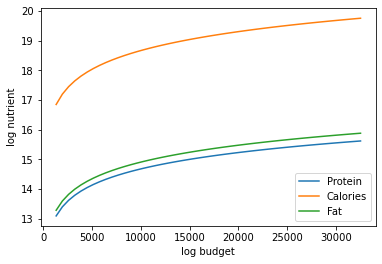

In [93]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(reference_x/5,reference_x*5,50)
X = X.flatten()

UseNutrients = ['Protein','Calories','Fat']

df = pd.concat({myx:np.log(nutrient_demand(myx,p))[UseNutrients] for myx in X},axis=1).T
ax = df.plot()

ax.set_xlabel('log budget') 
ax.set_ylabel('log nutrient')

In [94]:
r.get_beta(as_df=True).sort_values() # this allows us to see which goods are the most elastic/inelastic

i
maize & products                             -0.058078
kerosene-pds                                 -0.014995
rice - P.D.S.                                 0.017503
matches                                       0.030918
wheat/atta - P.D.S.                           0.036592
                                                ...   
papad, bhujia, namkeen, mixture, chanachur    0.455317
orange,mausami                                0.456468
other fresh fruits                            0.474922
apple                                         0.505788
cake, pastry, prepared sweets                 0.520278
Name: beta, Length: 82, dtype: float64

Text(0, 0.5, 'log nutrient')

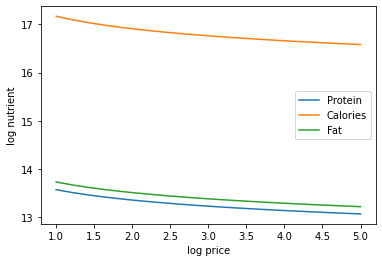

In [95]:
USE_GOOD = "apple"

ref_price = r.prices.sel(i=USE_GOOD,m=m,drop=True)

P = np.linspace(1,5,20).tolist()

ndf = pd.DataFrame({p0:np.log(nutrient_demand(reference_x,my_prices(p0,i=USE_GOOD)))[UseNutrients] for p0 in P}).T

ax = ndf.plot()

ax.set_xlabel('log price')
ax.set_ylabel('log nutrient') 

Text(0, 0.5, 'log nutrient')

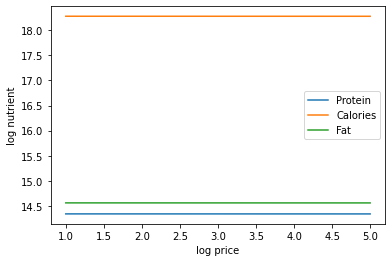

In [99]:
USE_GOOD = "rice - P.D.S."

ref_price = r.prices.sel(i=USE_GOOD,m=m,drop=True)

P = np.linspace(1,5,20).tolist()

ndf = pd.DataFrame({p0:np.log(nutrient_demand(reference_x,my_prices(p0,i=USE_GOOD)))[UseNutrients] for p0 in P}).T

ax = ndf.plot()

ax.set_xlabel('log price')
ax.set_ylabel('log nutrient') 

In [97]:
def nutrient_adequacy_ratio(x,p):
    return nutrient_demand(x,p)/hh_rda #greater than 1 = adequate, less than 1 = less than adequate bc log of ratios

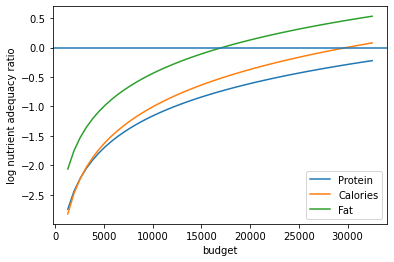

In [102]:
X = np.linspace(reference_x/5,reference_x*5,50)
X = X.flatten()
ndf = pd.concat({x:np.log(nutrient_adequacy_ratio(x,p))[UseNutrients] for x in X},axis=1).T

ax = (ndf-np.log(1000)).plot()

ax.set_xlabel('budget')
ax.set_ylabel('log nutrient adequacy ratio')
ax.axhline(0)


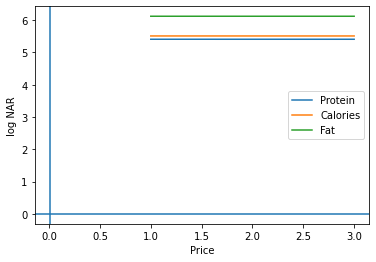

In [39]:
poorer_x = reference_x/2

Pscale = np.linspace(1,3,20).tolist()

log_nar = {s0:np.log(nutrient_adequacy_ratio(reference_x,my_prices(s0,p,i=USE_GOOD)))[UseNutrients] for s0 in Pscale}

log_nar = pd.DataFrame(log_nar).T

ax = log_nar.plot(ylabel='log NAR',xlabel='Price')


ax.axhline(0)
ax.axvline(p[USE_GOOD])

It should be noted that our plots and analyses generated above are based on our n dataframe, which is the nutrients dataframe provided for us from the NSS data. The only nutrients included are protein, fat, and calories. To form a more complete analysis and get a better understanding of the nutritional adequacy of households in Bihar, we would like to look at other nutrients as well. We will do this by converting our food items into nutrients using FDC codes, as we have done in project 2, and (for some members our group as well) in project 3.

# Food Conversion Table & Nutritional Adequacy of Demands Part II

We found the fdc IDs of each food item in our n dataset, imported below as fdc_codes.

In [67]:
fdc_codes = pd.read_csv('proj_3_fdc_codes.csv').set_index('Item')
fdc_codes = fdc_codes.reset_index()
fdc_codes

,Item,ID
0,apple,1102644
1,arhar (tur),1977550
2,baby food,1102843
3,bajra & products,1799770
4,banana,1102653
...,...,...
90,urd,1898206
91,"vanaspati, margarine",1103828
92,walnut,2118446
93,watermelon,1102698


In [68]:
fdc_codes = fdc_codes[fdc_codes['Item'].isin(n.index)] #make sure to include items in the n dataset above
len(fdc_codes)

31

In [69]:
estimated_quantities = q_bihar_n.groupby('i').mean()
estimated_quantities = estimated_quantities[estimated_quantities.index.isin(fdc_codes['Item'])]
estimated_quantities.head()

,total_quantity,Calories,Fat,Protein
i,,,,
apple,1.318311,590.0,5.0,2.0
arhar (tur),1.568844,3350.0,17.0,223.0
besan,0.552420,3400.0,12.0,220.0
bread (bakery),0.775502,2450.0,7.0,78.0
brinjal,2.385902,240.0,3.0,14.0


In [73]:
Q = fdc_codes
#Q['Quantity'] = [1000]*len(fdc_codes)
Q['Quantity'] = estimated_quantities['total_quantity'].to_list()
Q['Quantity'] = Q['Quantity'] * 10 #convert from kg to hectograms
Q = Q.reset_index()
Q.head() #Q is a dataframe that indicates quantities of each item in fdc_codes

/tmp/ipykernel_25/1322898960.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Q['Quantity'] = estimated_quantities['total_quantity'].to_list()
/tmp/ipykernel_25/1322898960.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Q['Quantity'] = Q['Quantity'] * 10


,index,Item,ID,Quantity
0,0,apple,1102644,13.183112
1,1,arhar (tur),1977550,15.688439
2,9,besan,2091506,5.524203
3,11,bread (bakery),1100621,7.755023
4,12,brinjal,2024758,23.859016


After matching all of the food items across the different dataframes for uniformity, we ran the following cell to produce a dataframe that has the nutritional content of each food item we're looking at. We will use the information in this dataframe to map the nutrients to the predicted consumption per household, qhat.

In [74]:
import fooddatacentral as fdc
apikey = 'CDXgPa1HVqJab8EFllem1ikOF75m2ELYwziKtICr'
D = {}
count = 0
for food in Q.Item.tolist():
    try:
        FDC = Q.loc[Q.Item==food,:].ID[count]
        count+=1
        print(FDC)
        D[food] = fdc.nutrients(apikey,FDC).Quantity
    except AttributeError: 
        warnings.warn("Couldn't find FDC Code %s for food %s." % (food,FDC))        

D = pd.DataFrame(D,dtype=float).fillna(0)

D

1102644
1977550
2091506
1100621
2024758
1103343
1103345
2029648
170497
2216557
175304
168448
1100536
1102666
1942595
2008520
2091229
2155640
172420
1100404
172337
1103364
1103153
1102879
1103374
2129576
2077766
1126152
1103276
1103828
522973


,apple,arhar (tur),besan,bread (bakery),brinjal,cabbage,cauliflower,chicken,chillis (green),french beans and barbati,...,onion,palak,potato,radish,"refined oil [sunflower, soyabean, saffola, etc.]",rice - other sources,"suji, rawa",tomato,"vanaspati, margarine",wheat/atta - other sources
Alanine,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.082,0.0,...,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0
"Alcohol, ethyl",0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.000,0.0,...,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0
Amino acids,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.000,0.0,...,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0
Arginine,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.096,0.0,...,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0
Ash,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.600,0.0,...,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vitamin K (Dihydrophylloquinone),0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.000,0.0,...,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0
Vitamin K (phylloquinone),2.20,0.0,0.0,0.20,0.0,38.20,15.50,0.0,14.300,0.0,...,0.40,178.00,4.10,1.30,0.0,0.0,0.0,7.90,101.30,0.0
Vitamins and Other Components,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.000,0.0,...,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0
Water,85.56,0.0,0.0,35.70,0.0,90.39,92.07,0.0,87.740,0.0,...,89.11,82.03,72.09,95.27,0.0,0.0,0.0,94.52,37.58,0.0


In [79]:
qhat = pd.read_csv('qhat_bihar.csv')
qhat = qhat.set_index(['t', 'm', 'j'])
qhat.head()

apple  arhar (tur)  banana       besan  \
t m j                                                         
1 1 470441101  2639.995325  1659.125400     NaN  726.465664   
    470441102  1042.342338  1136.653880     NaN  448.704296   
    470441201  1047.269911  1482.081243     NaN  636.119070   
    470441202  1368.947645  1495.042945     NaN  627.090476   
    470441203  1178.226715  1569.226732     NaN  536.378372   

               biscuits, chocolates  black pepper  bread (bakery)  \
t m j                                                               
1 1 470441101                   NaN           NaN      640.673689   
    470441102                   NaN           NaN      520.619697   
    470441201                   NaN           NaN      722.342601   
    470441202                   NaN           NaN      670.925393   
    470441203                   NaN           NaN      566.039238   

                   brinjal      cabbage  cake, pastry, prepared sweets  ...  \
t m j                                                                   ...   
1 1 470441101  2804.504727  3002.372978                            NaN  ...   
    470441102  1903.614296  2050.762277                            NaN  ...   
    470441201  2724.921981  3024.971187                            NaN  ...   
    470441202  2597.196392  2752.571949                            NaN  ...   
    470441203  2397.189358  2426.329423                            NaN  ...   

               sewai, noodles  sugar - other sources  suji, rawa  tea : cups  \
t m j                                                                          
1 1 470441101      646.271095            3484.198321  913.260804         NaN   
    470441102      451.076979            1976.960460  591.110329         NaN   
    470441201      501.180769            3182.126511  812.989933         NaN   
    470441202      580.936474            3083.668613  799.348157         NaN   
    470441203      508.116536            3047.975725  716.216142         NaN   

               tea : leaf       tomato  turmeric  vanaspati, margarine  \
t m j                                                                    
1 1 470441101         NaN  2807.114109       NaN            695.123155   
    470441102         NaN  1435.139514       NaN            364.110379   
    470441201         NaN  1850.249515       NaN            493.759679   
    470441202         NaN  2171.984762       NaN            521.776751   
    470441203         NaN  1757.453362       NaN            557.292136   

               wheat/atta - P.D.S.  wheat/atta - other sources  
t m j                                                           
1 1 470441101         10352.186018                23221.854219  
    470441102          9155.209342                17634.644634  
    470441201         10389.639345                34192.794413  
    470441202         10814.960997                28368.361167  
    470441203         10384.087530                30632.773950  

[5 rows x 82 columns]

In [80]:
food_list = qhat.columns.values.tolist()
d_list = D.columns.values.tolist()

#cross filter and match the two dfs; replace NaN values with 0 
final_q = qhat.filter(items=d_list).replace(np.nan,0)/30 #convert monthly predicted intak to daily 
final_d = D.filter(items=food_list).replace(np.nan,0)

In [82]:
predicted_consumption = final_q@final_d.T 
#predicted_consumption = predicted_consumption[predicted_consumption['']]
predicted_consumption.head()

Alanine  Alcohol, ethyl  Amino acids    Arginine         Ash  \
t m j                                                                           
1 1 470441101  58.822064             0.0          0.0  204.936791  319.049083   
    470441102  50.997527             0.0          0.0  152.707737  239.805991   
    470441201  74.802146             0.0          0.0  238.148362  355.260301   
    470441202  68.593702             0.0          0.0  204.436777  326.690298   
    470441203  66.665225             0.0          0.0  200.154241  302.048625   

               Aspartic acid     Betaine  Caffeine   Calcium, Ca  \
t m j                                                              
1 1 470441101     160.055243  680.021790       0.0  42569.594298   
    470441102     137.891389  412.973196       0.0  29171.262637   
    470441201     201.994346  705.572727       0.0  41827.421087   
    470441202     185.705702  548.976951       0.0  39650.137887   
    470441203     179.763622  543.557512       0.0  35264.775903   

               Carbohydrate, by difference  ...  Vitamin D (D2 + D3)  \
t m j                                       ...                        
1 1 470441101                163622.272903  ...            85.731856   
    470441102                119622.482157  ...            44.906947   
    470441201                218270.495457  ...            60.897027   
    470441202                190991.275980  ...            64.352466   
    470441203                195412.775282  ...            68.732697   

               Vitamin D (D2 + D3), International Units  \
t m j                                                     
1 1 470441101                                       0.0   
    470441102                                       0.0   
    470441201                                       0.0   
    470441202                                       0.0   
    470441203                                       0.0   

               Vitamin D3 (cholecalciferol)  Vitamin E (alpha-tocopherol)  \
t m j                                                                       
1 1 470441101                           0.0                   1347.574724   
    470441102                           0.0                    818.538355   
    470441201                           0.0                   1199.282395   
    470441202                           0.0                   1167.919310   
    470441203                           0.0                   1085.389697   

               Vitamin E, added  Vitamin K (Dihydrophylloquinone)  \
t m j                                                               
1 1 470441101               0.0                               0.0   
    470441102               0.0                               0.0   
    470441201               0.0                               0.0   
    470441202               0.0                               0.0   
    470441203               0.0                               0.0   

               Vitamin K (phylloquinone)  Vitamins and Other Components  \
t m j                                                                     
1 1 470441101               30507.365520                            0.0   
    470441102               20710.508001                            0.0   
    470441201               29651.346729                            0.0   
    470441202               28476.690840                            0.0   
    470441203               25072.925640                            0.0   

                       Water    Zinc, Zn  
t m j                                     
1 1 470441101  121164.467729  870.482884  
    470441102   81516.966660  606.313185  
    470441201  120170.176149  939.126295  
    470441202  113671.423970  829.047354  
    470441203  102741.287785  777.411580  

[5 rows x 114 columns]

In [46]:
#q_bihar_n = q_bihar_n.groupby('j').sum()
#q_bihar_n

In [83]:
transposed_D = D.T

In [77]:
import warnings 

def other_nutrient_demand(x,p): 
    with warnings.catch_warnings(): #gets rids of messy warnings
        warnings.simplefilter("ignore")
        c = r.demands(x,p) #compute quantities demand for all food

    n0,c0 = transposed_D.align(c,axis=0,join='inner') #alignment trick
    
    N = n0.T@c0 #takes quantities demand (c0) and multiplies by fct0

    N = N.loc[~N.index.duplicated()]
    
    return N

/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(uf

Text(0, 0.5, 'log nutrient')

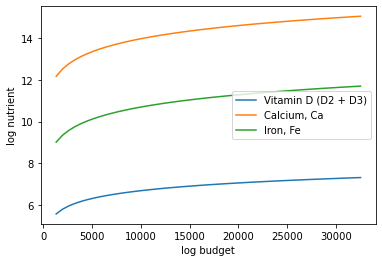

In [78]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(reference_x/5,reference_x*5,50)
X = X.flatten()

UseNutrients = ['Vitamin D (D2 + D3)', 'Calcium, Ca', 'Iron, Fe']

df = pd.concat({myx:np.log(other_nutrient_demand(myx,p))[UseNutrients] for myx in X},axis=1).T
ax = df.plot()

ax.set_xlabel('log budget') 
ax.set_ylabel('log nutrient')

/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(uf

Text(0, 0.5, 'log nutrient')

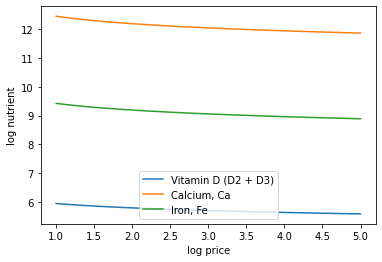

In [84]:
USE_GOOD = "apple"

ref_price = r.prices.sel(i=USE_GOOD,m=m,drop=True)

P = np.linspace(1,5,20).tolist()

ndf = pd.DataFrame({p0:np.log(other_nutrient_demand(reference_x,my_prices(p0,i=USE_GOOD)))[UseNutrients] for p0 in P}).T

ax = ndf.plot()

ax.set_xlabel('log price')
ax.set_ylabel('log nutrient') 

/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(uf

Text(0, 0.5, 'log nutrient')

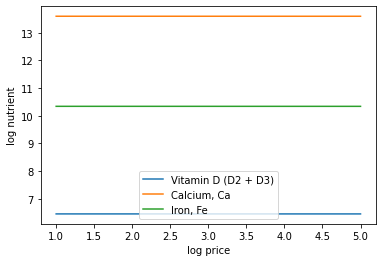

In [85]:
USE_GOOD = "rice - P.D.S."

ref_price = r.prices.sel(i=USE_GOOD,m=m,drop=True)

P = np.linspace(1,5,20).tolist()

ndf = pd.DataFrame({p0:np.log(other_nutrient_demand(reference_x,my_prices(p0,i=USE_GOOD)))[UseNutrients] for p0 in P}).T

ax = ndf.plot()

ax.set_xlabel('log price')
ax.set_ylabel('log nutrient') 

In [86]:
def other_nutrient_adequacy_ratio(x,p):
    return other_nutrient_demand(x,p)/hh_rda #greater than 1 = adequate, less than 1 = less than adequate bc log of ratios

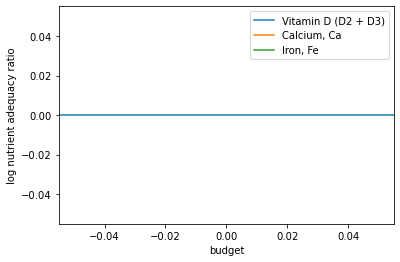

In [89]:
X = np.linspace(reference_x/5,reference_x*5,50)
X = X.flatten()
ndf = pd.concat({x:np.log(other_nutrient_adequacy_ratio(x,p))[UseNutrients] for x in X},axis=1).T

ax = (ndf).plot()

ax.set_xlabel('budget')
ax.set_ylabel('log nutrient adequacy ratio')
ax.axhline(0)
